<a href="https://colab.research.google.com/github/sthirupalreddy/MNIST-MULTILAYER/blob/main/MNIST_MULTILAYER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation ,Dropout
from keras.optimizers import Adam,RMSprop

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


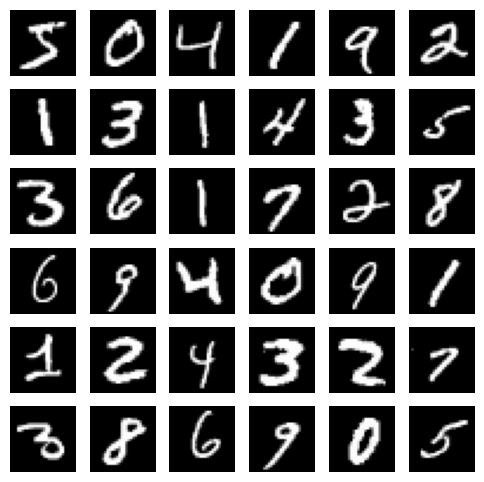

In [ ]:
#import dataset
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Select the first 36 images and their corresponding indices
index = range(36)
images = x_train[:36]

#plot a sample digit
plt.figure(figsize=(6,6))
for i in range(len(index)):
    plt.subplot(6,6,i+1) # This line and the following lines are part of the for loop
    image =images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close("all")

In [ ]:
#building model architecture using keras
from keras.utils import to_categorical, plot_model

In [ ]:
#compute no of labels
num_labels=len(np.unique(y_train))

In [ ]:
#convert labels into one-hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
#resize & normalise

# Define the input size for the flattened images
input_size = 28 * 28

x_train=np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32') / 255
x_test=np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
#Setting network parameter
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
#Model architecture is three-layer MLP with ReLU and dropout at each layer
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#implement MLP using keras
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
#implement MLP using keras
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=batch_size)
#model testing
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7610 - loss: 0.7439
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9389 - loss: 0.2071
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9524 - loss: 0.1587
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9618 - loss: 0.1274
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9652 - loss: 0.1132
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9674 - loss: 0.1028
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9713 - loss: 0.0909
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9726 - loss: 0.0875
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9733 - loss: 0.0826
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9771 - loss: 0.0716
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9766 - loss: 0.0737
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11